## 2. Обработка данных

### Срез (slice)

Самый простой метод обработки данных, просто возвращает ту часть данных, местоположение которой (индексы) удовлетворяет определенным условиям.

In [5]:
a:str = "Pack my box with five dozen liquor jugs"

start, stop = 8, 21

b:str = a[start:stop]  # Значения от start до stop-1
c:str = a[start:]  # Значения от start до конца структуры
d:str = a[:stop]  # Значения от начала до stop-1
e:str = a[:]  # Полная копия структуры

print(b, "\n",
      c, "\n",
      d, "\n",
      e, "\n")

box with five 
 box with five dozen liquor jugs 
 Pack my box with five 
 Pack my box with five dozen liquor jugs 



Значения start и stop могут быть отрицательными, это будет означать, что отсчет ведется от конца структуры. Можно также использовать значение step, чтобы на выход среза попали не все подряд данные из входной структуры.

In [13]:
a:str = "Step on no pets"

b:str = a[-4:]  # «Хвостик»
c:str = a[::-1]  # Реверс входной строки
d:str = a[4::-1]  # Первые четыре значения, реверсированы
e:str = a[::2]  # Каждый второй символ

print(b, "\n",
      c, "\n",
      d, "\n",
      e, "\n")


pets 
 step on no petS 
  petS 
 Se nn es 



### Сортировка (sort, sorted)

В сортировке всё самое интересное спрятано под капотом (мы ненадолго вернемся к этой теме чуть ниже, в разделе «Алгоритмы»), пока рассмотрим только Python-специфичный синтаксис.  
Надо различать методы sort() и sorted(), первый сортирует данные in-place, второй порождает новую структуру.

In [8]:
a: list = [5, 2, 3, 1, 4]

b: list = sorted(a)
print(a, b)

a.sort()
print(a)

[5, 2, 3, 1, 4] [1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


И sort(), и sorted() имеют параметр key для указания функции, которая будет вызываться на каждом элементе. Если вам больше по нраву сортировка при помощи функции, принимающей два аргумента (или вы привыкли к cmp в Python 2), присмотритесь к functools.cmp_to_key().

In [11]:
# Регистрозависимое сравнение строк

dinos: str = "Dinosaurs were Big and small"
a = sorted(dinos.split())
print(a)

# Регистронезависимое сравнение строк

dinos: str = "Dinosaurs were Big and small"
b = sorted(dinos.split(), key=str.lower)
print(b)

['Big', 'Dinosaurs', 'and', 'small', 'were']
['and', 'Big', 'Dinosaurs', 'small', 'were']


Сложносочиненные структуры данных можно сортировать по key=lambda el: el[1] или даже, например по key=lambda el: (el[1], el[0]).

### bisect и бинарный поиск

Бинарный поиск существенно быстрее, чем обычный (см. раздел «Алгоритмы»), но требует предварительной сортировки коллекции, по которой осуществляется поиск.

In [39]:
import bisect

a: list[int] = [12, 6, 8, 19, 1, 33]

a.sort()
print(f"Sorted: {a}")

print(bisect.bisect(a, 20))  # Найти индекс для потенциальной вставки

bisect.insort(a, 15)  # Вставка значения в отсортированную последовательность
print(a)

# Бинарный поиск

def binary_search(a, x, lo=0, hi=None):
    if hi is None:
        hi = len(a)

    pos = bisect.bisect_left(a, x, lo, hi)
    return pos if pos != hi and a[pos] == x else -1

print(binary_search(a, 15))

Sorted: [1, 6, 8, 12, 19, 33]
5
[1, 6, 8, 12, 15, 19, 33]
4


### Comprehension

Comprehension, которое переводится то как списковое включение, то как абстракция списков ([Википедия](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BA%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B2%D0%BA%D0%BB%D1%8E%D1%87%D0%B5%D0%BD%D0%B8%D0%B5)), то вообще никак не переводится — способ компактного описания операций обработки списков (а примениительно к Python — еще и словарей, и множеств).

Проще говоря, если вам нужно получить из списка другой список, включающий только те значения, которые удовлетворяют какому-то определенному условию, или вычисляемые из первого списка по каким-то определенным правилам, то comprehension — претендент на решение этой задачи № 1.

In [8]:
# Примеры Comprehension

a = [i+1 for i in range(10)]  # list
b  = {i for i in range(10) if i > 5}  # set
c = (2*i+5 for i in range(10))  # iter
d = {i: i**2 for i in range(10)}  # dict

print(a,"\n", b, "\n", list(c), "\n", d)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 {8, 9, 6, 7} 
 [5, 7, 9, 11, 13, 15, 17, 19, 21, 23] 
 {0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


Тут главное не перегнуть палку. Если запись comprehension становится слишком сложной и нечитаемой, возможно, стоит развернуть логику в «нормальный» цикл или в другой более удобочитаемый алгоритм. Comprehension соблазняет записывать «однострочникоми» достаточно сложные выражения, но не забывайте, что программист примерно 90 % времени читает код, и только 10 % пишет, так что если выражение будет плохочитаемым, вы усложните жизнь и себе, и свои коллегам.

Есть более-менее [удачные](https://leetcode.com/problems/flipping-an-image/discuss/2378360/python-1-liner-988-speed-97-mem) «однострочники», есть быстрые, но [плохочитаемые](https://leetcode.com/problems/reverse-string-ii/discuss/2281269/python-fast-beats-984-and-short-almost-1-line-solution-with-python-38-features-pep572), написанные из спортивного интереса (это ссылки на решенные мной задачки на leetcode), желательно использовать comprehension в меру; лучше написать понятный развернутый алгоритм, чем непонятный, но обложенный пояснениями (если нет особых требований к производительности, само собой).

Еще немного про list comprehension:

In [ ]:
# new_list = [expression for member in iterable (if conditional)]

fruits: list = ["Lemon", "Apple", "Banana", "Kiwi", "Watermelon", "Pear"]

e_fruits = [fruit for fruit in fruits if "e" in fruit]
#                                     ☝ условие
print(e_fruits)

upper_fruits = [fruit.upper() for fruit in fruits]
#                     ☝ выражение
print(upper_fruits)

# Пример разбиения списка на фрагменты одинаковой длины
chunk_len = 2
chunk_fruits = [fruits[i:i + chunk_len] for i in range(0, len(fruits), chunk_len)]
print(chunk_fruits)


['Lemon', 'Apple', 'Watermelon', 'Pear']
['LEMON', 'APPLE', 'BANANA', 'KIWI', 'WATERMELON', 'PEAR']
[['Lemon', 'Apple'], ['Banana', 'Kiwi'], ['Watermelon', 'Pear']]


Dict comprehension:

In [1]:
# new_dict = {expression for member in iterable (if conditional)}

d: dict = {"Italy": "Pizza", "US": "Hot-Dog", "China": "Dim Sum", "South Korea": "Kimchi"}
print(d)

a: dict = {k: v for k, v in d.items() if "i" in v}  # Вернет новый словарь, отфильтрованный по значению
print(a)

b: dict = {k: v for k, v in d.items() if "i" in k}  # Вернет новый словарь, отфильтрованный по ключу
print(b)

c: dict = {k: v for k, v in d.items() if len(v) >= 7}  # Вернет новый словарь, отфильтрованный по длине значений
print(c)

{'Italy': 'Pizza', 'US': 'Hot-Dog', 'China': 'Dim Sum', 'South Korea': 'Kimchi'}
{'Italy': 'Pizza', 'China': 'Dim Sum', 'South Korea': 'Kimchi'}
{'China': 'Dim Sum'}
{'US': 'Hot-Dog', 'China': 'Dim Sum'}


Попробуйте самостоятельно поиграться с set comprehension. Не забывайте, что set «переваривает» только уникальные значения, поэтому в результате вы можете получить не совсем то, на что рассчитывали.

### Функциональное программирование (Map, Filter, Reduce, Partial)

На случай, если начиная с этого момента и до конца текущего жизненного цикла вы собираетесь к месту и не месту использовать приёмы функционального программирования, чтобы сделать свой код «воистину крутым», просто процитирую вам Джоэля Граса, автора книги «Data Science: Наука о данных с нуля»: «В первом издании этой книги были представлены функции partial, map, reduce и filter языка Python. На своем пути к просветлению я понял, что этих функций лучше избегать, и их использование в книге было заменено включениями в список, циклами и другими, более Python'овскими конструкциями». Такие дела...  

In [5]:
import functools

# Преобразует все входящие значения при помощи указанной функции
iter1 = map(lambda x: x + 1, range(10))
print(list(iter1))

# Передает в выходной итератор только значения, удовлетворяющие условию
iter2 = filter(lambda x: x > 5, range(10))
print(list(iter2))

# Применяет указанную функцию ко всей последовательности входных данных, сводя их к единственному значению
a = functools.reduce(lambda out, x: out + x, range(10))
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[6, 7, 8, 9]
45


In [10]:
import functools

def sum(a,b):
    return a + b

add_const = functools.partial(sum, 10)

print(add_const(5))

15


Если вам не сразу станет понятно, как работает функция partial (и зачем она нужна), не расстраивайтесь, вы не одиноки :). Вот, пожалуйста, тема на Stackoverflow: «[I am not able to get my head on how the partial works](https://stackoverflow.com/questions/15331726/how-does-functools-partial-do-what-it-does)». Там, кстати, есть совет, как partial могут быть полезны при организации pipe с включением функций, имеющих разное количество аргументов.

### Any, All

any() вернет True, если хотя бы один элемент итерируемой коллекции истинен, all() вернет True только в случае истинности всех элементов коллекции.

In [5]:
animals = ["Squirrel", "Beaver", "Fox"]
sentence = "Bison likes squirrels and beavers"

any_animal: bool = any(animal.lower() in sentence.lower() for animal in animals)
print(any_animal)

all_animal: bool = all(animal.lower() in sentence.lower() for animal in animals)
print(all_animal)

True
False


### Itertools

Методы модуля itertools возвращают *итераторы*. В «нормальные» данные итераторы перегоняются при помощи for, next или list(). Итераторы могут быть бесконечными (порождаются при помощи count(), cycle() или repeat()) и конечными (accumulate(), chain(), takewhile() и другие). Лучше изучить их все, хотя бы поверхностно, потому что даже относительно редко употребляемый метод, например, какой-нибудь zip_longest(), иногда весьма и весьма пригождается, идеально ложась на поставленную задачу.

In [24]:

from itertools import count, repeat, cycle, pairwise, chain

# Итератор, возвращающий равномерно распределенные значения
i1 = count(start=0, step=.1)
print(next(i1))
print(next(i1))
print(next(i1))

# Итератор, возвращающий один и тот же объект бесконечно, если не указано значение аргумента times
i2 = repeat("Wow!", times=3)
print(list(i2))

# Итератор, циклично и бесконечно возвращающий элементы итерируемого объекта
i3 = cycle([1, 2])
print(next(i3))
print(next(i3))
print(next(i3))

# Возвращает элементы входной коллекции попарно
i4 = pairwise([1, 2, 3, 4, 5])
print(list(i4))

# Итератор, формирующий из нескольких входных последовательностей одну общую
i5 = chain(["A", "B", "C"],["D", "E", "F"],["G", "H", "I"])
print(list(i5))
# Кстати, такой же трюк можно провернуть при помощи обычной sum(), задав ей начальный параметр []
a = sum([["A", "B", "C"],["D", "E", "F"],["G", "H", "I"]], [])
print(a)

0
0.1
0.2
['Wow!', 'Wow!', 'Wow!']
1
2
1
[(1, 2), (2, 3), (3, 4), (4, 5)]
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']


Комбинаторика

In [34]:
from itertools import product, combinations, combinations_with_replacement, permutations

# Создает множество, содержащее все упорядоченные пары элементов из входных множеств
a = product("abc", "xyz")
print(list(a))

b = product([0, 1], repeat=3)
print(list(b))

# Возвращает подпоследовательности длины r из элементов входного итерируемого объекта, повторяющиеся элементы не допускаются
c = combinations("abc", r=2)
print(list(c))

# Возвращает подпоследовательности длины r из элементов входного итерируемого объекта, повторяющиеся элементы допустимы
d = combinations_with_replacement("abc", r=2)
print(list(d))

# Выдает перестановки элементов итерируемого объекта
e = permutations("abc", r=2)
print(list(e))

[('a', 'x'), ('a', 'y'), ('a', 'z'), ('b', 'x'), ('b', 'y'), ('b', 'z'), ('c', 'x'), ('c', 'y'), ('c', 'z')]
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[('a', 'b'), ('a', 'c'), ('b', 'c')]
[('a', 'a'), ('a', 'b'), ('a', 'c'), ('b', 'b'), ('b', 'c'), ('c', 'c')]
[('a', 'b'), ('a', 'c'), ('b', 'a'), ('b', 'c'), ('c', 'a'), ('c', 'b')]


### datetime encode

Python использует Unix Epoch: "1970-01-01 00:00 UTC"

In [3]:
from datetime import datetime
from dateutil.tz import tzlocal

dt1: datetime = datetime.fromisoformat("2021-10-04 00:05:23.555+00:00")  # Может вызвать ValueError
dt2: datetime = datetime.strptime("21/10/04 17:30", "%d/%m/%y %H:%M")   # Подробнее про форматы - https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
dt3: datetime = datetime.fromordinal(100_000)  # 100000-й день от 1.1.0001
dt4: datetime = datetime.fromtimestamp(20_000_000.01)  # Время в секундах с начала Unix Epoch

tz = tzlocal()
dt5: datetime = datetime.fromtimestamp(20_000_000.01, tz)  # С учетом часового пояса

print (f"{dt1}\n {dt2}\n {dt3}\n {dt4}\n {dt5}")

2021-10-04 00:05:23.555000+00:00
 2004-10-21 17:30:00
 0274-10-16 00:00:00
 1970-08-20 16:33:20.010000
 1970-08-20 16:33:20.010000+05:00


### datetime decode

In [ ]:
from datetime import datetime

dt1: datetime = datetime.today()

s1: str = dt1.isoformat()
s2: str = dt1.strftime("%d/%m/%y %H:%M")  # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
i: int = dt1.toordinal()
a: float = dt1.timestamp()  # Секунды с начала Unix Epoch

print (f"{dt1}\n {s1}\n {s2}\n {i}\n {a}")

2022-09-06 17:50:38.041159
 2022-09-06T17:50:38.041159
 06/09/22 17:50
 738404
 1662468638.041159


### Арифметика datetime

In [ ]:
from datetime import date, time, datetime, timedelta
from dateutil.tz import UTC, tzlocal, gettz, datetime_exists, resolve_imaginary

d: date  = date.today()
dt1: datetime = datetime.today()
dt2: datetime = datetime(year=1981, month=12, day=2)
td1: timedelta = timedelta(days=5)
td2: timedelta = timedelta(days=1)

d = d + td1  # date = date ± timedelta
dt3 = dt1 - td1  # datetime = datetime ± timedelta

td3 = dt1 - dt2  # timedelta = datetime - datetime

td4 = 10 * td1  # timedelta = const * timedelta
c: float = td1/td2  # timedelta/timedelta

print (f"{d}\n {dt3}\n {td3}\n {td4}\n {c}")

2022-09-11
 2022-09-01 17:50:38.132916
 14888 days, 17:50:38.132916
 50 days, 0:00:00
 5.0


### Операции над строками. lower(), upper(), capitalize() и title()

In [ ]:
s: str = "camelCase string"

print(s.lower())
print(s.upper())
print(s.capitalize())
print(s.title())

camelcase string
CAMELCASE STRING
Camelcase string
Camelcase String


### strip()

In [ ]:
s: str = "  ~~##A big blahblahblah##~~  "

s = s.strip()  # Strips all whitespace characters from both ends
print(s)

s = s.strip("~#")  # Strips all passed characters from both ends
print(s)

s = s.lstrip(" A")  # Strips all passed characters from left end
print(s)

s = s.rstrip("habl")  # Strips all passed characters from right end
print(s)


~~##A big blahblahblah##~~
A big blahblahblah
big blahblahblah
big 


### split()

In [ ]:
s1: str = "Follow the white rabbit, Neo"

c1 = s1.split()  # Splits on one or more whitespace characters
print(c1)

c2 = s1.split(sep=", ", maxsplit=1)  # Splits on "sep" str at most "maxsplit" times
print(c2)

s2: str = "Beware the Jabberwock, my son!\n The jaws that bite, the claws that catch!"

c3 = s2.splitlines(keepends=False)  # On [\n\r\f\v\x1c-\x1e\x85\u2028\u2029] and \r\n.
print(c3)

# split() vs rsplit()

c4 = s2.split(maxsplit=2)
c5 = s2.rsplit(maxsplit=2)

print(c4, c5)

['Follow', 'the', 'white', 'rabbit,', 'Neo']
['Follow the white rabbit', 'Neo']
['Beware the Jabberwock, my son!', ' The jaws that bite, the claws that catch!']
['Beware', 'the', 'Jabberwock, my son!\n The jaws that bite, the claws that catch!'] ['Beware the Jabberwock, my son!\n The jaws that bite, the claws', 'that', 'catch!']


### ord(), chr()

In [ ]:
s1: str = "abcABC!"

for ch in s1:
    print(f"{ch} -> {ord(ch)}")  # Returns an integer representing the Unicode character

nums = [72, 101, 108, 108, 111, 33]

for num in nums:
    print(f"{num} -> {chr(num)}")

a -> 97
b -> 98
c -> 99
A -> 65
B -> 66
C -> 67
! -> 33
72 -> H
101 -> e
108 -> l
108 -> l
111 -> o
33 -> !


### Regex

Регулярные выражения — отдельная область знаний, и весьма-весьма непростая область. Тут, пожалуй, самое время для бородатой шутки про то, что «если вы решили свою проблему при помощи регулярных выражений — теперь у вас две проблемы».  

Регулярки похожи на вхождение в воду на пляже острова Гуам в сторону Марианской впадины — даже когда вы думаете, что погрузились *реально* глубоко, то, скорее всего, вы просто не видите впередилежащей бездны. Но — знать регулярные выражения, хотя бы на начальном уровне, необходимо для решения целого класса задач, а то, что вёрткие регулярки периодически поворачиваются к вам своими, кхм... новыми гранями, придется простить, переварить и принять.  

Вот [здесь](https://habr.com/ru/post/349860/) есть грамотное и методически выдержанное введение в тему, пока же посмотрим на основные возможности регулярных выражений.

In [5]:
import re

s1: str = "123 abc ABC 456"

m1 = re.search("[aA]", s1)  # Ищет первое вхождение паттерна, при неудаче возвращает None
print(m1, m1.group(0))

m2 = re.fullmatch("[aA]", s1)  # Проверка, подходит ли строка под шаблон
print(m2)

c1: list = re.findall("[aA]", s1)  # Найти в строке все непересекающиеся шаблоны
print(c1)

def replacer(s):
    return chr(ord(s[0]) + 1)  # Следующий символ из алфавита

s2 = re.sub("\w", replacer, s1)  # Вы можете использовать функцию вместо шаблона
print(s2)

c2 = re.split("\d", s1)
print(c2)

iter = re.finditer("\D", s1)  # Итератор по непересекающимся шаблонам

for ch in iter:
    print(ch.group(0), end= "")

<re.Match object; span=(4, 5), match='a'> a
None
['a', 'A']
234 bcd BCD 567
['', '', '', ' abc ABC ', '', '', '']
 abc ABC 

### Match Object

In [6]:
import re

m3 = re.match(r"(\w+) (\w+)", "John Connor, leader of the Resistance")

s3: str = m3.group(0)  # Возвращает полное совпадение
s4: str = m3.group(1)  # Возвращает часть в первых скобках
t1: tuple = m3.groups()
start: int = m3.start()  # Возвращает начальный индекс совпадения
end: int = m3.end()  # Возвращает конечный индекс совпадения
t2: tuple[int, int] = m3.span()  # Кортеж (start, end)

print (f"{s3}\n {s4}\n {t1}\n {start}\n {end}\n {t2}\n")

John Connor
 John
 ('John', 'Connor')
 0
 11
 (0, 11)



### Файлы

Файловые операции стоят немного особняком от остальных методов обработки данных, так как подразумевают взаимодействие с неким постоянным энергонезависимым хранилищем данных. Так что если вам нужно сохранить данные *на завтра*, или, наоборот, нужно прочитать данные, которые вам предоставили *неделю назад*, то вам, очевидно, нужно будет работать с файлами. В файлах же осядет информация, которую мы передаем базам данных, но эту тему мы рассмотри ниже.

In [ ]:
f = open("f.txt", mode='r', encoding="utf-8", newline=None)

print(f.read())

Hello from file!


На всякий случай, если вы испытываете программистский зуд даже небольшой степени выраженности, напоминаю — эта статья в оригинале написана в Jupiter Notebook, все примеры кода интерактивны, не надо на них *смотреть*, их надо видоизменять, корректировать, дорабатывать.  
Особенно это важно, если вам в приведенных сниппетах что-то непонятно. Обязательно запустите этот код в IDE, погоняйте пошаговый отладчик; только когда концы свяжутся, только когда вы поймете, как функционирует этот кусочек кода, только тогда промельнкнёт маленькая искорка и ваша квалификация как программиста немного подрастёт.  
Исходный код скачивается [отсюда](https://github.com/amaargiru/pycore), VS Code лежит [здесь](https://code.visualstudio.com/download).

Режимы (mode):  
"r" — чтение (поведение по умоолчанию)  
"w" — запись (информация, ранее присутствующая в файле, будет стёрта)  
"x" — эксклюзивное создание и запись; если файл уже существует, будет выброшено исключение FileExistsError  
"a" — открытие с последующим добавлением в конец файла  
"w+" — чтение и запись  
"r+" — чтение и запись с начала файла  
"a+" — чтение и запись с конца файла  
"t" — текстовый режим ("rt", "wt" и т. д.; поведение по умолчанию)  
"b" — двоичный режим ("rb", "wb", "xb" и т. д.)  

encoding=None — будет использована кодировка по умолчанию (зависит от системы). Если нет специальных требований, просто используйте везде encoding="utf-8".

newline=None — при чтении системные символы конца строки будут конвертированы в "\n"; при записи, наоборот, "\n" будут конвертированы в системные символы конца строки.

Возможные исключения при работе с файлами:  
*FileNotFoundError* при чтении в режиме "r" или "r+".  
*FileExistsError* при записи в режиме "x".  
*IsADirectoryError*, *PermissionError* — в любом режиме.  

### Чтение из файла

Открывает файл и возвращает файловый объект.  
Для работы с файлами лучше использовать менеджеры контекста (рассмотрены ниже), т. е. конструкции вида "with open...". Даже если что-то пойдет не так, как задумано (например, вы не обработаете исключение во время работы с файлом), менеджер контекста «зачистит хвосты», и ваша оплошность не отразится, например, на файловой системе.

In [ ]:
with open("f.txt", encoding="utf-8") as f:
    chars = f.read(5)  # Reads chars/bytes or until EOF
    print(chars)

    f.seek(0)  # Moves to the start of the file. Also seek(offset) and seek(±offset, anchor), where anchor is 0 for start, 1 for current position and 2 for end

    lines: list[str] = f.readlines()  # Also readline()
    print(lines)

Hello
['Hello from file!']


### Запись в файл

In [ ]:
with open("f.txt", "w", encoding="utf-8") as f:
    f.write("Hello from file!")  # Или f.writelines(<collection>)

### Пути (Paths)

При работе с файлами не обойтись без манипулирования файловыми путями.

In [ ]:
from os import getcwd, path, listdir
from pathlib import Path

s1: str = getcwd()  # Возвращает текущую рабочую директорию
print(s1)

s2: str = path.abspath("f.txt")  # Возвращает полный путь
print(s2)

s3: str = path.basename(s2)  # Возвращает имя файла
s4: str = path.dirname(s2)  # Возвращает путь без файла
t1: tuple = path.splitext(s2)  # Возвращает кортеж из пути и имени файла
print(s3, s4, t1)

p = Path(s2)
st = p.stat()
print(st)

b1: bool = p.exists()
b2: bool = p.is_file()
b3: bool = p.is_dir()
print(b1, b2, b3)

c: list = listdir(path=s1)  # Возвращает список имен файлов, находящихся по указанному пути
print(c)

s5: str = p.stem  # Возвращает имя файла без расширения
s6: str  = p.suffix  # Возвращает расширение файла
t2: tuple = p.parts  # Возвращает все элементы пути как отдельные строки
print(s5, s6, t2)

c:\Works\amaargiru\pycore
c:\Works\amaargiru\pycore\f.txt
f.txt c:\Works\amaargiru\pycore ('c:\\Works\\amaargiru\\pycore\\f', '.txt')
os.stat_result(st_mode=33206, st_ino=2251799814917120, st_dev=3628794147, st_nlink=1, st_uid=0, st_gid=0, st_size=16, st_atime=1662468638, st_mtime=1662468638, st_ctime=1661089564)
True True False
['.git', '.gitignore', '.pytest_cache', '01_python.ipynb', '01_python.md', '02_postgre.md', '03_architecture.md', '04_algorithms.ipynb', '04_algorithms.md', '05_admin_devops.md', '06_pytest_mock.ipynb', '06_pytest_mock.md', '07_fastapi.md', '08_flask.md', '1.bin', '1.json', 'compose_readme.bat', 'coupling_vs_cohesion.svg', 'f.txt', 'gitflow.svg', 'graph_for_dfs.jpg', 'pycallgraph3.png', 'readme.md']
f .txt ('c:\\', 'Works', 'amaargiru', 'pycore', 'f.txt')


### JSON

Человекочитаемый формат для хранения и передачи данных.

In [ ]:
import json

d: dict = {1: "Lemon", 2: "Apple", 3: "Banana!"}

object_as_string: str = json.dumps(d, indent=2)
print(object_as_string)

restored_object = json.loads(object_as_string)

# Write object to JSON file
with open("1.json", 'w', encoding='utf-8') as file:
    json.dump(d, file, indent=2)

# Read object from JSON file
with open("1.json", encoding='utf-8') as file:
    restored_from_file = json.load(file)
    
print(restored_from_file)


{
  "1": "Lemon",
  "2": "Apple",
  "3": "Banana!"
}
{'1': 'Lemon', '2': 'Apple', '3': 'Banana!'}


### Pickle

Бинарный формат для хранения и передачи данных.

In [ ]:
import pickle

d: dict = {1: "Lemon", 2: "Apple", 3: "Banana!"}

# Запись объекта в бинарный файл
with open("1.bin", "wb") as file:
    pickle.dump(d, file)

# Чтение объекта из файла
with open("1.bin", "rb") as file:
    restored_from_file = pickle.load(file)

print(restored_from_file)

{1: 'Lemon', 2: 'Apple', 3: 'Banana!'}


### Protocol Buffers
Если вы хотите передавать и хранить данные, используя универсальную структуру, одинаково хорошо понимаемую всеми языками программирования (как JSON) и занимающую мало места (как Pickle), то можно посмотреть в сторону Protocol Buffers ([Wikipedia](https://en.wikipedia.org/wiki/Protocol_Buffers), [примеры для Python](https://developers.google.com/protocol-buffers/docs/pythontutorial)). Есть еще альтернативы, например, [FlatBuffers](https://google.github.io/flatbuffers/), [Apache Avro](https://avro.apache.org/) или [Thrift](https://thrift.apache.org/).

### Простейшие вычисления — Sum, Count, Min, Max

In [ ]:
a: list[int] = [1, 2, 3, 4, 5, 2, 2]

s = sum(a)
print(s)

c = a.count(2)  # Вернет количество вхождений
print(c)

mn = min(a)
print(mn)

mx = max(a)
print(mx)

19
3
1
5


Присмотритесь к [встроенным функциям](https://docs.python.org/3/library/functions.html), там есть еще кое-что, касающееся элементарной математики.

### Базовая математика

In [ ]:
from math import pi

a: float = pi ** 2  # Or pow(pi, 2)
print(f"Power: {a}")

b: float = round(pi, 2)
print(f"Round: {b}")

c: int = round(256, -2)
print(f"Int round: {c}")

d: float = abs(-pi)
print(f"Abs: {d}")

e: float = abs(10+10j)  # Or e: float = abs(complex(real=10, imag=10))
print(f"Complex abs: {e}")


Power: 9.869604401089358
Round: 3.14
Int round: 300
Abs: 3.141592653589793
Complex abs: 14.142135623730951


### Побитовые операции

In [ ]:
a: int = 0b01010101
b: int = 0b10101010

print(f"And: 0b{a&b:08b}")
print(f"Or: 0b{a|b:08b}")
print(f"Xor: 0b{a^b:08b}")
print(f"Left shift: 0b{a << 4:08b}")
print(f"Right shift: 0b{b >> 4:08b}")
print(f"Not: 0b{~a:08b}")

And: 0b00000000
Or: 0b11111111
Xor: 0b11111111
Left shift: 0b10101010000
Right shift: 0b00001010
Not: 0b-1010110


### Подсчет битов

In [ ]:
a: int = 4242
print(f"{a} in binary format: 0b{a:b}")

c = a.bit_count()  # Returns the number of ones in the binary representation of the absolute value of the integer
print(f"Bit count: {c}")

4242 in binary format: 0b1000010010010
Bit count: 4


### Fractions

In [ ]:
from fractions import Fraction

f = Fraction("0.2").as_integer_ratio()

print(f)

(1, 5)


### Евклидово расстояние между двумя точками

In [ ]:
import math

p1 = (0.22, 1, 12)
p2 = (-0.12, 3, 7)

print(math.dist(p1, p2))

5.39588732276722


### NumPy

Мини-язык для манипулирования массивами. На удачных сценариях работает в сотни раз быстрее встроенных функций. Еще более быстрая альтернатива работает на GPU, называется [CuPy](https://github.com/cupy/cupy) и опять-таки [обещает](https://medium.com/rapids-ai/single-gpu-cupy-speedups-ea99cbbb0cbb) стократный прирост производительности, только уже по сравнению с NumPy. Так что если вам нужен какой-нибудь быстрый [FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform) или еще какой числогрыз, то вы знаете, что делать. Если вы дружите с английским, то изучайте [официальный мануал](https://numpy.org/doc/stable/), если нет — на «Хабре» есть [перевод](https://habr.com/ru/post/352678/) (как всегда, читайте комментарии, там немало полезного).

Небольшое отступление.

Во-первых, тут мы переходим границу между встроенной функциональность языка и внешними библиотеками. Надо понимать, что успех Python во многом основан именно на богатстве его экосистемы (хотя, впрочем, тоже самое можно сказать и про JavaScript, и про C#); сам язык предоставляет богатую, но всё же ограниченную функциональность, в то время как функционал внешних библиотек практически безграничен, это как бесконечно разнообразные кубики Лего. Соответственно, очень часто для решения задачи не нужно реализовывать алгоритм с нуля, на чистом Python'е, достаточно подобрать нужную библиотеку.

Во-вторых, популярность разных библиотек Python (в том числе и конкурирующих) сильно разнится. Например, NumPy — очень популярная библиотека, но в мире существуют буквально миллионы Python-разработчиков, которые *никогда* не работали с NumPy, просто в силу своего круга функциональных обязанностей.

Для начинающего разработчика это представляет собой довольно нешуточную проблему — как конкретно двигаться вперед, какие библиотеки изучать, ведь знания чистого Python, как правило, недостаточно для формирования актуального резюме.

Дам вам небольшой совет. Ежегодно компания JetBrains (делающая среди прочего очень классную IDE PyCharm) проводит всемирный опрос Python-разработчиков, а потом выкладывает полученные результаты в виде так называемого [Python Developers Survey Results](https://lp.jetbrains.com/python-developers-survey-2021/). Например, если вы почитаете результы последнего исследовния, то найдете там довольно чёткие ориентиры: например, в разделе «Data science frameworks and libraries» в топе находятся NumPy, Pandas (рассмотрен ниже) и Matplotlib, в тестировании с большим отрывом лидирует pytest (смотри ниже), в других областях вперед вырываются Flask (Django на втором месте с крошечным отрывом), SQLAlchemy (vs Django ORM) и PostgreSQL (vs SQLite), про них мы тоже еще поговорим. Так что в целом, общее направление развития определить можно.

Однако, вернемся к NumPy. Не забывайте, что в основе NumPy лежат массивы, а все данные в массиве должны быть одинакового типа (просто на случай, если вы уже познали пр-р-рел-л-лесть списков Python). Создание массивов:

In [11]:
import numpy as np

a1 = np.array([1, 2, 3, 4, 5], float)  # Получение массива из списка
print(a1[0:2])

a2 = np.zeros(5)  # Массив, заполненный нулями
print(a2)

a3 = np.arange(0, 6, 1)  # Использование диапазона, np.arange(from_inclusive, to_exclusive, step_size)
print(a3)

a4 = np.random.randint(6, size=10)  # Создание массива, содержащего случайные значения, np.random.randint(low_inclusive, high_exclusive=None, size=None, dtype=int)
print(a4)

a5 = np.random.randint(6, size=(2, 5))  # Создание многомерного массива, содержащего случайные значения
print(a5)

print(a5.shape)  # Число строк и столбцов в массиве

print(a5.dtype)  # Тип переменных

print(1 in a5)  # Проверка наличия элемента

[1. 2.]
[0. 0. 0. 0. 0.]
[0 1 2 3 4 5]
[2 2 4 0 0 0 0 4 0 5]
[[1 0 3 5 0]
 [3 1 4 2 2]]
(2, 5)
int32
True


Базовые математические операции ([полный список](https://numpy.org/doc/stable/reference/routines.math.html)):

In [18]:
import numpy as np

a1 = np.array([1, 2, 3, 4, 5])
a2 = np.array([6, 7, 8, 9, 10])

a3 = a1 + 1
print(a3)

a4 = a1 + a2
print(a4)

a5 = a1 ** 3
print(a5)

a6 = a1 ** a2
print(a6)

[2 3 4 5 6]
[ 7  9 11 13 15]
[  1   8  27  64 125]
[      1     128    6561  262144 9765625]


Вообще, можно сказать, что быстрые математические операции над многомерными массивами — это главная «фишка» NumPy. Вы просто говорите: возьми такие-то массивы и проделай над ними такую-то операция. Далее все эти данные «проваливаются» в высокоскоростное ядро NumPy, где к ним уже можно применить всю мощь вашего процессора, которая раньше была вам недоступна (ну, или доступна не полностью) из-за Python-интерпретатора. Так что, если вы пытаетесь в цикле итерировать массив NumPy, по факту передавая данные на нижний уровень небольшими порциями (например, объектами row), то имейте ввиду, что тем самым используете возможности NumPy недостаточно эффективно; попробуйте решить задачу без итерирования.    

Sum, Min, Max

In [16]:
import numpy as np

a1 = np.random.randint(6, size=(2, 10))  # NumPy поддерживает несколько десятков видов распределений, например, Пуассона и Стьюдента
print(a1)

s = np.sum(a1)  # Сумма всех элементов
print(s)

mn = a1.min(axis=0)  # Наименьшие числа в каждом столбце
print(mn)

mx = a1.max(axis=1)  # Наибольшие числа в каждой строке
print(mx)

amin = a1.argmin(axis=0)  # Индексы минимальных элементов в каждом столбце
print(amin)

amax = a1.argmax(axis=1)  # Индексы максимальных элементов в каждой строке
print(amax)

uniq = np.unique(a1)  # Извлечение уникальных элементов
print(uniq)

[[3 0 4 1 0 5 4 0 1 3]
 [0 3 4 0 0 1 4 0 5 4]]
42
[0 0 4 0 0 1 4 0 1 3]
[5 5]
[1 0 0 1 0 1 0 0 0 0]
[5 8]
[0 1 3 4 5]


В качестве домашнего задания попробуйте самостоятельно применить prod(), mean(), var(), std(), median(), cov() и corrcoef().

Форматирование массивов:

In [26]:
import numpy as np

a = np.random.randint(6, size=(3, 5))
print(a)

a1 = a.reshape((5, 3))  # Форматирование. Если есть возможность, создается новый view на те же самые данные
print(a1)

a.shape = (5, 3)  # Форматирование in-place
print(a)

print(a.shape)
a = a[:, :, np.newaxis]  # Увеличение размерности массива с 2 до 3
print(a)
print(a.shape)

a = a.flatten()  # Конвертация в одномерный массив
print(a)
print(a.shape)

[[5 5 5 1 1]
 [0 2 0 5 5]
 [0 2 5 4 5]]
[[5 5 5]
 [1 1 0]
 [2 0 5]
 [5 0 2]
 [5 4 5]]
[[5 5 5]
 [1 1 0]
 [2 0 5]
 [5 0 2]
 [5 4 5]]
(5, 3)
[[[5]
  [5]
  [5]]

 [[1]
  [1]
  [0]]

 [[2]
  [0]
  [5]]

 [[5]
  [0]
  [2]]

 [[5]
  [4]
  [5]]]
(5, 3, 1)
[5 5 5 1 1 0 2 0 5 5 0 2 5 4 5]
(15,)


Копирование массивов:

In [35]:
import numpy as np
import copy

a = np.random.randint(10, size=(4, 4))
print(a)

# Неглубокая (shallow) копия
a1 = np.copy(a)

# Глубокая (deep) копия
a2 = copy.deepcopy(a)

# Копирование ссылки
a3 = a

a[0, 0] = 10
print(a[0, 0] == a1[0, 0])
print(a[0, 0] == a2[0, 0])
print(a[0, 0] == a3[0, 0])

[[5 3 1 4]
 [0 8 7 0]
 [1 7 4 7]
 [5 3 5 2]]
False
False
True


NumPy очень мощный инструмент, не зря же он стоит на первом месте в списке «Data science frameworks and libraries» обзора, который мы упоминали чуть выше. Но углубляться в эту тему очень уж глубоко в рамках поверхностного обзора, пожалуй, не стоит; вряд ли прямо сейчас вам кровь из носу нужно освоить скалярное, тензорное и внешнее произведение матриц или познать (вспомнить?) специфику линейной алгебры. Думаю, даже если мы сейчас начнем описывать транспонирование или выбор оси, по которой будет произведена конкатенация массивов, то это уже будет, что называется, «не в коня корм».  
К тому же, изучая тонкости употребления NumPy, начинает появляться соблазн упоминания SciPy, предоставляющего еще более широкий функционал, а после первого "import scipy" у нас начнется уже полное непотребство. Давайте пока пройдем мимо этой кроличьей норы, для первого знакомства она слишком глубока.

Единственное, что еще можно освоить в конце ознакомительного курса NumPy — взаимодействие с внешним миром. Изучите для начала load/save/savez (бинарники) и loadtxt/savetxt (человекочитаемый формат).

### Pandas

Библиотека обработки и анализа данных. Работа с данными строится поверх библиотеки NumPy.  
В первом, грубом приближении pandas можно воспринимать как связку Excel + VisualBasic-скрипты, только более гибкую и удобную. Библиотека создает своеобразный мостик между профессиями Python-программиста, дата-сайентиста и аналитика, позволяя сосредоточиться в большей степени именно на очистке и анализе данных, на читабельности отчетов, а не на программировании. Pandas также поддерживает широкий спектр «красивостей» при выводе информации, позволяя, например, добавлять в выводимые данные градиентную подсветку (heatmap) или визуализировать отклонение от среднего (bar chart).

Для того, чтобы как следует «распробовать» pandas, по-хорошему надо загрузить какой-нибудь развесистый набор данных, но мы, пожалуй, не будем погружаться в глубины глубин, просто поиграем небольшим самодельным датасетом.

In [4]:
import pandas as pd
from pandas import Series

s = pd.Series([0, 1, 4, 7, 8, 10, 12])
print(s)
print(s[2])

0     0
1     1
2     4
3     7
4     8
5    10
6    12
dtype: int64
4


Series — базовая структура данных pandas. Вы можете воспринимать её как упорядоченный словарь или как столбец Excel, смотря по тому, какая аналогия вам ближе.

Индексы Series можно задавать вручную:

In [8]:
import pandas as pd
from pandas import Series

s = pd.Series([0, 1, 4, 7, 8, 10, 12], index=["a", "b", "c", "d", "x", "y", "z"])
print(s)
print(s["x"])
print(s[["x", "y", "z"]])  # Выборка
print(s[s > 5])  # Фильтрация

a     0
b     1
c     4
d     7
x     8
y    10
z    12
dtype: int64
8
x     8
y    10
z    12
dtype: int64
d     7
x     8
y    10
z    12
dtype: int64


При объединении нескольких Series получается DataFrame, который в первом приближении можно рассматривать как лист Excel.

<el> = <Sr>.loc[key]                          # Or: <Sr>.iloc[index]
<Sr> = <Sr>.loc[keys]                         # Or: <Sr>.iloc[indexes]
<Sr> = <Sr>.loc[from_key : to_key_inclusive]  # Or: <Sr>.iloc[from_i : to_i_exclusive]

<el> = <Sr>[key/index]                        # Or: <Sr>.key
<Sr> = <Sr>[keys/indexes]                     # Or: <Sr>[<key_range/range>]
<Sr> = <Sr>[bools]                            # Or: <Sr>.i/loc[bools]

<Sr> = <Sr> ><== <el/Sr>                      # Returns a Series of bools.
<Sr> = <Sr> +-*/ <el/Sr>                      # Items with non-matching keys get value NaN.

<Sr> = <Sr>.append(<Sr>)                      # Or: pd.concat(<coll_of_Sr>)
<Sr> = <Sr>.combine_first(<Sr>)               # Adds items that are not yet present.
<Sr>.update(<Sr>)                             # Updates items that are already present.

<Sr>.plot.line/area/bar/pie/hist()            # Generates a Matplotlib plot.
matplotlib.pyplot.show()                      # Displays the plot. Also savefig(<path>).

#### Series — Aggregate, Transform, Map:

<el> = <Sr>.sum/max/mean/idxmax/all()         # Or: <Sr>.agg(lambda <Sr>: <el>)
<Sr> = <Sr>.rank/diff/cumsum/ffill/interpl()  # Or: <Sr>.agg/transform(lambda <Sr>: <Sr>)
<Sr> = <Sr>.fillna(<el>)                      # Or: <Sr>.agg/transform/map(lambda <el>: <el>)

>>> sr = Series([1, 2], index=['x', 'y'])
x    1
y    2
 
 text
+-----------------+-------------+-------------+---------------+
|                 |    'sum'    |   ['sum']   | {'s': 'sum'}  |
+-----------------+-------------+-------------+---------------+
| sr.apply(…)     |      3      |    sum  3   |     s  3      |
| sr.agg(…)       |             |             |               |
+-----------------+-------------+-------------+---------------+

+-----------------+-------------+-------------+---------------+
|                 |    'rank'   |   ['rank']  | {'r': 'rank'} |
+-----------------+-------------+-------------+---------------+
| sr.apply(…)     |             |      rank   |               |
| sr.agg(…)       |     x  1    |   x     1   |    r  x  1    |
| sr.transform(…) |     y  2    |   y     2   |       y  2    |
+-----------------+-------------+-------------+---------------+
 
Last result has a hierarchical index. Use `'<Sr>[key_1, key_2]'` to get its values.

   0    1    2    3    4    5     6
0  0    1    4    7    8   10    12
1  0  100  200  300  600  900  1200
0      1
1    100
Name: 1, dtype: int64
4
2    4
3    7
Name: 0, dtype: int64


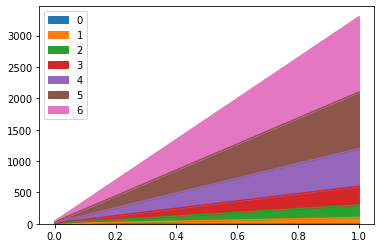

In [34]:
import pandas as pd
from pandas import Series, DataFrame

s1 = pd.Series([0, 1, 4, 7, 8, 10, 12])
s2 = pd.Series([0, 100, 200, 300, 600, 900, 1200])

df = pd.DataFrame([s1, s2])
print(df)
print(df[1])
print(df[2][0])
print(df.iloc[0][2:4])

import matplotlib.pyplot as plt  # Простейшая визуализация
df.plot.area()
plt.show()

Давайте сделаем что-то более похожее на реальный анализ данных.

### DataFrame
Table with labeled rows and columns.

>>> DataFrame([[1, 2], [3, 4]], index=['a', 'b'], columns=['x', 'y'])
   x  y
a  1  2
b  3  4

<DF>    = DataFrame(<list_of_rows>)           # Rows can be either lists, dicts or series.
<DF>    = DataFrame(<dict_of_columns>)        # Columns can be either lists, dicts or series.

<el>    = <DF>.loc[row_key, column_key]       # Or: <DF>.iloc[row_index, column_index]
<Sr/DF> = <DF>.loc[row_key/s]                 # Or: <DF>.iloc[row_index/es]
<Sr/DF> = <DF>.loc[:, column_key/s]           # Or: <DF>.iloc[:, column_index/es]
<DF>    = <DF>.loc[row_bools, column_bools]   # Or: <DF>.iloc[row_bools, column_bools]

<Sr/DF> = <DF>[column_key/s]                  # Or: <DF>.column_key
<DF>    = <DF>[row_bools]                     # Keeps rows as specified by bools.
<DF>    = <DF>[<DF_of_bools>]                 # Assigns NaN to False values.

<DF>    = <DF> ><== <el/Sr/DF>                # Returns DF of bools. Sr is treated as a row.
<DF>    = <DF> +-*/ <el/Sr/DF>                # Items with non-matching keys get value NaN.

<DF>    = <DF>.set_index(column_key)          # Replaces row keys with values from a column.
<DF>    = <DF>.reset_index()                  # Moves row keys to a column named index.
<DF>    = <DF>.sort_index(ascending=True)     # Sorts rows by row keys.
<DF>    = <DF>.sort_values(column_key/s)      # Sorts rows by the passed column/s.

#### DataFrame — Merge, Join, Concat:
 
>>> l = DataFrame([[1, 2], [3, 4]], index=['a', 'b'], columns=['x', 'y'])
   x  y
a  1  2
b  3  4
>>> r = DataFrame([[4, 5], [6, 7]], index=['b', 'c'], columns=['y', 'z'])
   y  z
b  4  5
c  6  7

 text
+------------------------+---------------+------------+------------+--------------------------+
|                        |    'outer'    |   'inner'  |   'left'   |       Description        |
+------------------------+---------------+------------+------------+--------------------------+
| l.merge(r, on='y',     |    x   y   z  | x   y   z  | x   y   z  | Joins/merges on column.  |
|            how=…)      | 0  1   2   .  | 3   4   5  | 1   2   .  | Also accepts left_on and |
|                        | 1  3   4   5  |            | 3   4   5  | right_on parameters.     |
|                        | 2  .   6   7  |            |            | Uses 'inner' by default. |
+------------------------+---------------+------------+------------+--------------------------+
| l.join(r, lsuffix='l', |    x yl yr  z |            | x yl yr  z | Joins/merges on row keys.|
|           rsuffix='r', | a  1  2  .  . | x yl yr  z | 1  2  .  . | Uses 'left' by default.  |
|           how=…)       | b  3  4  4  5 | 3  4  4  5 | 3  4  4  5 | If r is a series, it is  |
|                        | c  .  .  6  7 |            |            | treated as a column.     |
+------------------------+---------------+------------+------------+--------------------------+
| pd.concat([l, r],      |    x   y   z  |     y      |            | Adds rows at the bottom. |
|           axis=0,      | a  1   2   .  |     2      |            | Uses 'outer' by default. |
|           join=…)      | b  3   4   .  |     4      |            | A series is treated as a |
|                        | b  .   4   5  |     4      |            | column. Use l.append(sr) |
|                        | c  .   6   7  |     6      |            | to add a row instead.    |
+------------------------+---------------+------------+------------+--------------------------+
| pd.concat([l, r],      |    x  y  y  z |            |            | Adds columns at the      |
|           axis=1,      | a  1  2  .  . | x  y  y  z |            | right end. Uses 'outer'  |
|           join=…)      | b  3  4  4  5 | 3  4  4  5 |            | by default. A series is  |
|                        | c  .  .  6  7 |            |            | treated as a column.     |
+------------------------+---------------+------------+------------+--------------------------+
| l.combine_first(r)     |    x   y   z  |            |            | Adds missing rows and    |
|                        | a  1   2   .  |            |            | columns. Also updates    |
|                        | b  3   4   5  |            |            | items that contain NaN.  |
|                        | c  .   6   7  |            |            | R must be a DataFrame.   |
+------------------------+---------------+------------+------------+--------------------------+

#### DataFrame — Aggregate, Transform, Map:
 
<Sr> = <DF>.sum/max/mean/idxmax/all()         # Or: <DF>.apply/agg(lambda <Sr>: <el>)
<DF> = <DF>.rank/diff/cumsum/ffill/interpl()  # Or: <DF>.apply/agg/transform(lambda <Sr>: <Sr>)
<DF> = <DF>.fillna(<el>)                      # Or: <DF>.applymap(lambda <el>: <el>)
 
All operations operate on columns by default. Pass `'axis=1'` to process the rows instead.

>>> df = DataFrame([[1, 2], [3, 4]], index=['a', 'b'], columns=['x', 'y'])
   x  y
a  1  2
b  3  4

 text
+-----------------+-------------+-------------+---------------+
|                 |    'sum'    |   ['sum']   | {'x': 'sum'}  |
+-----------------+-------------+-------------+---------------+
| df.apply(…)     |             |       x  y  |               |
| df.agg(…)       |     x  4    |  sum  4  6  |     x  4      |
|                 |     y  6    |             |               |
+-----------------+-------------+-------------+---------------+

+-----------------+-------------+-------------+---------------+
|                 |    'rank'   |   ['rank']  | {'x': 'rank'} |
+-----------------+-------------+-------------+---------------+
| df.apply(…)     |      x  y   |      x    y |        x      |
| df.agg(…)       |   a  1  1   |   rank rank |     a  1      |
| df.transform(…) |   b  2  2   | a    1    1 |     b  2      |
|                 |             | b    2    2 |               |
+-----------------+-------------+-------------+---------------+
 
Use `'<DF>[col_key_1, col_key_2][row_key]'` to get the fifth result's values.

#### DataFrame — Plot, Encode, Decode:
 
import matplotlib.pyplot as plt
<DF>.plot.line/bar/hist/scatter([x=column_key, y=column_key/s]); plt.show()
 
<DF> = pd.read_json/html('<str/path/url>')
<DF> = pd.read_csv/pickle/excel('<path/url>')
<DF> = pd.read_sql('<table_name/query>', <connection>)
<DF> = pd.read_clipboard()
 
<dict> = <DF>.to_dict(['d/l/s/sp/r/i'])
<str>  = <DF>.to_json/html/csv/markdown/latex([<path>])
<DF>.to_pickle/excel(<path>)
<DF>.to_sql('<table_name>', <connection>)
 
### GroupBy
Object that groups together rows of a dataframe based on the value of the passed column.
 
>>> df = DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 6]], index=list('abc'), columns=list('xyz'))
>>> df.groupby('z').get_group(6)
   x  y
b  4  5
c  7  8
 
<GB> = <DF>.groupby(column_key/s)             # DF is split into groups based on passed column.
<DF> = <GB>.apply(<func>)                     # Maps each group. Func can return DF, Sr or el.
<GB> = <GB>[column_key]                       # A single column GB. All operations return a Sr.
 
#### GroupBy — Aggregate, Transform, Map:
 
<DF> = <GB>.sum/max/mean/idxmax/all()         # Or: <GB>.agg(lambda <Sr>: <el>)
<DF> = <GB>.rank/diff/cumsum/ffill()          # Or: <GB>.transform(lambda <Sr>: <Sr>)
<DF> = <GB>.fillna(<el>)                      # Or: <GB>.transform(lambda <Sr>: <Sr>)
 
>>> gb = df.groupby('z')
      x  y  z
3: a  1  2  3
6: b  4  5  6
   c  7  8  6

 text
+-----------------+-------------+-------------+-------------+---------------+
|                 |    'sum'    |    'rank'   |   ['rank']  | {'x': 'rank'} |
+-----------------+-------------+-------------+-------------+---------------+
| gb.agg(…)       |      x   y  |      x  y   |      x    y |        x      |
|                 |  z          |   a  1  1   |   rank rank |     a  1      |
|                 |  3   1   2  |   b  1  1   | a    1    1 |     b  1      |
|                 |  6  11  13  |   c  2  2   | b    1    1 |     c  2      |
|                 |             |             | c    2    2 |               |
+-----------------+-------------+-------------+-------------+---------------+
| gb.transform(…) |      x   y  |      x  y   |             |               |
|                 |  a   1   2  |   a  1  1   |             |               |
|                 |  b  11  13  |   b  1  1   |             |               |
|                 |  c  11  13  |   c  2  2   |             |               |
+-----------------+-------------+-------------+-------------+---------------+

### Rolling
Object for rolling window calculations.

<R_Sr/R_DF/R_GB> = <Sr/DF/GB>.rolling(window_size)  # Also: `min_periods=None, center=False`.
<R_Sr/R_DF>      = <R_DF/R_GB>[column_key/s]        # Or: <R>.column_key
<Sr/DF/DF>       = <R_Sr/R_DF/R_GB>.sum/max/mean()  # Or: <R>.apply/agg(<agg_func/str>)